## ML CAPSTONE PROJECT : HEALTH TRACKER

## Introduction :

The Medication Effectiveness Dataset hosted on Kaggle provides valuable insights into medication effectiveness across various parameters. This dataset serves as a comprehensive resource for exploring the effectiveness of different medications, factors influencing their efficacy, and related attributes. It's curated to support projects focusing on machine learning, specifically in the domain of medication effectiveness analysis.

## Business Problem Statement :

Predicting Medication Effectiveness Based on Patient Profiles

## Data Dictionary

The dataset encompasses the following fields for each patient's record:

1. Patient ID: An exclusive identifier for each patient, represented as an integer.
2. Name: A randomly generated full name in string format.
3. Date of Birth: A randomly generated date of birth, reflecting ages between 1 and 100 years old. This is presented in date format.
4. Gender: Randomly assigned gender, denoted as either 'M' or 'F', represented as a string.
5. Medical Conditions: A list comprising three distinct, randomly chosen words signifying medical conditions, in string format.
6. Medications: A list featuring three unique, randomly selected words indicating medications, in string format.
7. Allergies: A list consisting of three distinct, randomly chosen words representing allergies, in string format.
8. Last Appointment Date: A date randomly generated within the past 2 years, represented in date format.

## Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Data Ingestion

In [27]:
df=pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Acciojob\ML Capstone Project\data\medical_records.csv")

In [28]:
df.head()

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   sourpatient_id         100000 non-null  int64 
 1   name                   100000 non-null  object
 2   date_of_birth          100000 non-null  object
 3   gender                 100000 non-null  object
 4   medical_conditions     100000 non-null  object
 5   medications            100000 non-null  object
 6   allergies              100000 non-null  object
 7   last_appointment_date  100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [30]:
df['date_of_birth']=pd.to_datetime(df['date_of_birth'])
df['last_appointment_date']=pd.to_datetime(df['last_appointment_date'])

Converted the 'date_of_birth' and 'last_appointment_date' columns from string format to datetime format.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   sourpatient_id         100000 non-null  int64         
 1   name                   100000 non-null  object        
 2   date_of_birth          100000 non-null  datetime64[ns]
 3   gender                 100000 non-null  object        
 4   medical_conditions     100000 non-null  object        
 5   medications            100000 non-null  object        
 6   allergies              100000 non-null  object        
 7   last_appointment_date  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 6.1+ MB


Determining the age of patients

In [32]:
df['date_of_birth'].dt.year

0        1967
1        1977
2        1926
3        1954
4        2015
         ... 
99995    1959
99996    1927
99997    1996
99998    1948
99999    1935
Name: date_of_birth, Length: 100000, dtype: int32

In [33]:
dt.date.today().year

2024

In [36]:
df['age']=dt.date.today().year - df['date_of_birth'].dt.year

In [37]:
df.head()

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9


Categorization of patients based on age group

In [38]:
df['age_group'] = df['age'].apply(lambda x: 'Minor' if x < 18 else 'Young Adult' if x < 35 else 'Middle Aged' if x < 60 else 'Senior')

In [40]:
df.head()

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,Middle Aged
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,Middle Aged
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,Senior
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,Senior
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,Minor


Days Since Last Visit

In [41]:
df['days_since_last_visit']=dt.date.today()-df['last_appointment_date'].dt.date

In [42]:
df.head()

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group,days_since_last_visit
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,Middle Aged,"636 days, 0:00:00"
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,Middle Aged,"433 days, 0:00:00"
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,Senior,"1094 days, 0:00:00"
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,Senior,"697 days, 0:00:00"
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,Minor,"1071 days, 0:00:00"


In [43]:
df['days_since_last_visit']=df['days_since_last_visit'].apply(lambda x: x.days)

Patients have been categorized based on their most recent visit

In [44]:
df['visit_frquency']=df['days_since_last_visit'].apply(lambda x : "0-200" if x<201 else "201-400" if x<401 else "401-600" if x<601 else "601-800" if x<801 else  ">800")

In [45]:
df.head()

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group,days_since_last_visit,visit_frquency
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,Middle Aged,636,601-800
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,Middle Aged,433,401-600
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,Senior,1094,>800
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,Senior,697,601-800
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,Minor,1071,>800


In [46]:
df.columns

Index(['sourpatient_id', 'name', 'date_of_birth', 'gender',
       'medical_conditions', 'medications', 'allergies',
       'last_appointment_date', 'age', 'age_group', 'days_since_last_visit',
       'visit_frquency'],
      dtype='object')

## EDA ON MEDICATION

In [47]:
df['medications'].nunique()

99992

In [48]:
med_vc = df['medications'].value_counts()
med_vc[med_vc.values>1]

medications
brother, building, understand    2
million, social, just            2
fly, Mrs, claim                  2
hot, population, year            2
state, eye, firm                 2
finish, early, new               2
turn, both, dream                2
order, economic, hard            2
Name: count, dtype: int64

In [50]:
df[df['medications'].apply(lambda x : x in med_vc[med_vc.values>1].index)]

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group,days_since_last_visit,visit_frquency
1730,1731,John Reed,2012-05-30,F,"kind, food, put","state, eye, firm","trouble, seven, keep",2023-01-08,12,Minor,470,401-600
7669,7670,Jimmy Smith,1948-02-29,M,"town, north, authority","order, economic, hard","none, able, act",2022-05-13,76,Senior,710,601-800
11281,11282,Virginia Tran,1966-01-10,M,"authority, assume, step","brother, building, understand","area, clearly, network",2022-12-20,58,Middle Aged,489,401-600
16299,16300,Valerie Durham,1994-03-27,F,"study, effect, pull","million, social, just","necessary, father, look",2022-06-21,30,Young Adult,671,601-800
17318,17319,Walter Brown,2004-10-05,F,"treat, party, yet","brother, building, understand","take, move, foreign",2022-09-01,20,Young Adult,599,401-600
18048,18049,Jerry Ingram,1995-05-14,F,"energy, event, agency","state, eye, firm","his, treatment, tonight",2022-08-20,29,Young Adult,611,601-800
20356,20357,Luis Lopez,2003-03-18,M,"hold, anyone, difficult","fly, Mrs, claim","data, within, recently",2022-06-17,21,Young Adult,675,601-800
39910,39911,Joshua Parks,1977-07-15,M,"stay, owner, fill","hot, population, year","network, all, next",2022-11-02,47,Middle Aged,537,401-600
42557,42558,Christopher Keller,1940-07-03,M,"economic, discussion, civil","finish, early, new","before, whatever, may",2022-02-06,84,Senior,806,>800
50282,50283,Erik Austin,1994-06-23,F,"professional, into, these","finish, early, new","from, also, morning",2021-11-07,30,Young Adult,897,>800


## Among the 100,000 records, there are merely 8 instances of duplication, where certain records appear twice in the dataset. While the medications prescribed for these cases remain uniform across patients, discrepancies arise in patient demographics, medical conditions, and allergies. Consequently, it becomes challenging to ascertain which medication is appropriate for particular medical conditions or allergies.

    Identify the top 5 most prescribed medications

In [51]:
medcation_counts = df['medications'].str.split(", ").explode().value_counts()
print("Most common ",medcation_counts.head())

Most common  medications
somebody    361
such        361
skin        360
learn       359
per         359
Name: count, dtype: int64


    Identify the prevalent combination of medications.

In [67]:
from itertools import combinations

In [69]:
medications_comb_counts = df['medications'].apply(lambda x: list(combinations(x.split(", "), 2))).explode().value_counts()
medications_comb_counts.head(10)

medications
(role, job)             6
(mention, leader)       6
(indicate, be)          5
(president, instead)    5
(pattern, economy)      5
(lawyer, executive)     5
(sing, impact)          5
(free, skill)           5
(treat, new)            5
(natural, as)           5
Name: count, dtype: int64

## EDA ON MEDICAL CONDITION

    Examine the frequency of different medical conditions and frequently prescribed medications. Explore potential correlations between specific conditions and the medications commonly prescribed for them.

In [70]:
df['medical_conditions'].nunique()

99995

In [71]:
mc_vc = df['medical_conditions'].value_counts()
mc_vc[mc_vc.values>1]

medical_conditions
should, across, threat    2
man, prove, make          2
account, second, yes      2
doctor, someone, keep     2
break, mention, need      2
Name: count, dtype: int64

In [72]:
df[df['medical_conditions'].apply(lambda x : x in mc_vc[mc_vc.values>1].index)]

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group,days_since_last_visit,visit_frquency
10800,10801,Luke Wood,1972-11-02,F,"doctor, someone, keep","at, ten, rise","source, suggest, rather",2022-04-06,52,Middle Aged,747,601-800
11858,11859,Jerry Lewis,1992-12-13,M,"man, prove, make","affect, morning, everybody","hit, above, thus",2023-03-04,32,Young Adult,415,401-600
33639,33640,Michael Russell,1962-06-04,F,"doctor, someone, keep","people, try, fund","rate, matter, probably",2021-10-27,62,Senior,908,>800
33872,33873,Lisa Garcia,1990-07-23,F,"account, second, yes","surface, use, fall","drop, together, analysis",2022-07-05,34,Young Adult,657,601-800
43067,43068,Meghan Mcdonald,2002-08-07,M,"break, mention, need","few, south, mission","rich, also, character",2021-10-04,22,Young Adult,931,>800
52007,52008,Amber Li,1956-11-29,M,"should, across, threat","enter, spring, adult","remain, free, develop",2023-03-13,68,Senior,406,401-600
56012,56013,Adam Vasquez,1991-06-29,F,"should, across, threat","official, stage, miss","drug, during, night",2022-09-19,33,Young Adult,581,401-600
81138,81139,Karen Jarvis,1950-12-11,M,"man, prove, make","very, president, her","decade, student, senior",2021-04-20,74,Senior,1098,>800
90640,90641,Jenny Gutierrez,1952-09-11,M,"account, second, yes","sport, affect, ground","yard, trade, girl",2022-12-08,72,Senior,501,401-600
97220,97221,Wesley Sullivan,1968-05-29,M,"break, mention, need","indicate, if, any","certainly, event, reflect",2022-08-02,56,Middle Aged,629,601-800


## Among the 100,000 records in the dataset, a staggering 99,995 feature unique medical conditions. Merely five medical conditions recur, suggesting that while certain patients share identical medical conditions, individualized medication prescriptions tailored by respective doctors account for variations such as allergies and age groups.

    Identify the top five medical conditions with the highest occurrence

In [74]:
med_condition_counts = df['medical_conditions'].str.split(", ").explode().value_counts()
print("Most common ",med_condition_counts.head())

Most common  medical_conditions
sea           368
ready         356
account       354
bad           353
population    352
Name: count, dtype: int64


    Find the prevalent combination of medical conditions

In [75]:
med_con_comb_counts = df['medical_conditions'].apply(lambda x: list(combinations(x.split(", "), 2))).explode().value_counts()
med_con_comb_counts.head(10)

medical_conditions
(contain, idea)        6
(around, resource)     5
(nice, field)          5
(young, everything)    5
(take, so)             5
(form, forward)        5
(mean, my)             5
(goal, president)      5
(me, another)          5
(serve, sign)          5
Name: count, dtype: int64

## EDA ON ALLERGIES

    Investigate the distribution of allergies and how they might influence the choice of medication

In [76]:
df['allergies'].nunique()

99996

In [77]:
ag_vc = df['allergies'].value_counts()
ag_vc[ag_vc.values>1]

allergies
arrive, nature, pass        2
nice, company, reason       2
watch, TV, agree            2
analysis, join, evidence    2
Name: count, dtype: int64

In [78]:
df[df['allergies'].apply(lambda x : x in ag_vc[ag_vc.values>1].index)]

,sourpatient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,age_group,days_since_last_visit,visit_frquency
21166,21167,James Davenport,1951-04-04,F,"last, idea, light","bill, those, law","analysis, join, evidence",2022-12-18,73,Senior,491,401-600
33825,33826,Sara Richardson,1933-11-15,M,"travel, environment, himself","friend, its, industry","analysis, join, evidence",2021-04-17,91,Senior,1101,>800
34384,34385,Barbara Roberts,1928-07-30,M,"reach, mention, adult","article, but, history","nice, company, reason",2022-01-31,96,Senior,812,>800
78015,78016,Jeffrey Ortiz,2000-02-12,F,"available, rich, art","home, woman, behind","nice, company, reason",2021-11-08,24,Young Adult,896,>800
85537,85538,Jenna Malone,1977-04-03,F,"answer, sell, appear","consider, international, here","arrive, nature, pass",2022-12-26,47,Middle Aged,483,401-600
87460,87461,Leroy Sanders,1981-02-16,M,"suffer, usually, find","provide, method, between","watch, TV, agree",2021-07-19,43,Middle Aged,1008,>800
94764,94765,Nicholas Franco,1948-03-06,M,"personal, wear, how","body, herself, school","arrive, nature, pass",2021-11-19,76,Senior,885,>800
96694,96695,Jonathan Roy,1971-06-04,F,"owner, these, time","yourself, others, physical","watch, TV, agree",2021-11-04,53,Middle Aged,900,>800


## Among the 100,000 records in the dataset, only four instances show overlap. Despite patients having similar allergies, medication prescriptions are uniquely tailored for each individual, taking into account differences in medical conditions and age groups.

    Identify the five most prevalent allergies

In [79]:
allergies_counts =df['allergies'].str.split(", ").explode().value_counts()
print("Most common ",allergies_counts.head())

Most common  allergies
two         358
goal        357
sense       357
many        357
strategy    356
Name: count, dtype: int64


    Find the most frequent combination of allergies

In [80]:
allergies_comb_counts = df['allergies'].apply(lambda x: list(combinations(x.split(", "), 2))).explode().value_counts()
allergies_comb_counts.head(10)

allergies
(house, name)         5
(top, old)            5
(also, pay)           5
(and, give)           5
(discussion, per)     5
(tell, similar)       5
(doctor, purpose)     5
(economy, usually)    5
(chair, then)         5
(parent, method)      5
Name: count, dtype: int64

## EDA ON PATIENT DEMOGRAPHICS

    Examine the dispersion of age and gender within the dataset, discerning any trends or patterns concerning gender, age categories, and visit frequency

In [81]:
df['gender'].value_counts()

gender
M    50208
F    49792
Name: count, dtype: int64

In [82]:
age_grp_cnt = df['age_group'].value_counts().reset_index()
age_grp_cnt

,age_group,count
0,Senior,42973
1,Middle Aged,24914
2,Young Adult,16860
3,Minor,15253


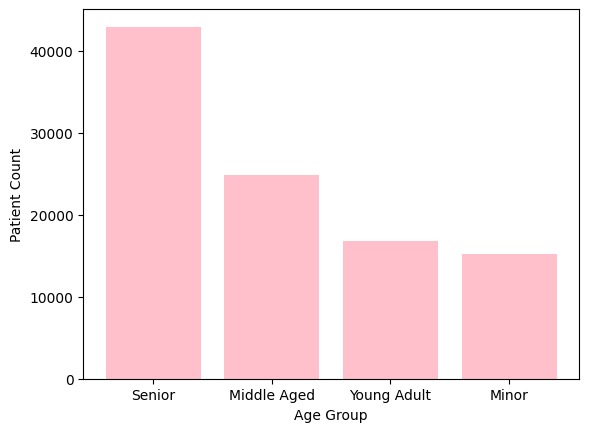

In [97]:
plt.bar(age_grp_cnt['age_group'],age_grp_cnt['count'],color='pink')
plt.xlabel('Age Group')
plt.ylabel('Patient Count')
plt.show()

In [98]:
df['last_appointment_date'].dt.year.value_counts().reset_index()

,last_appointment_date,count
0,2022,49913
1,2021,38257
2,2023,11830


In [99]:
df['visit_frquency'].value_counts().reset_index()

,visit_frquency,count
0,>800,43962
1,401-600,27497
2,601-800,27317
3,201-400,1224


In [100]:
df.groupby(['age_group','gender']).size().reset_index().rename(columns={0:'patient_count'})

,age_group,gender,patient_count
0,Middle Aged,F,12406
1,Middle Aged,M,12508
2,Minor,F,7579
3,Minor,M,7674
4,Senior,F,21504
5,Senior,M,21469
6,Young Adult,F,8303
7,Young Adult,M,8557


    Determine the percentage of patients in various age groups according to their visit frequency.

In [107]:
df.columns

Index(['sourpatient_id', 'name', 'date_of_birth', 'gender',
       'medical_conditions', 'medications', 'allergies',
       'last_appointment_date', 'age', 'age_group', 'days_since_last_visit',
       'visit_frquency'],
      dtype='object')

In [108]:
pvt = pd.pivot_table(
    data=df,
    index=['visit_frquency'],
    columns=['age_group'],
    values=['sourpatient_id'],
    aggfunc=['count']
)
pvt

count                         
               sourpatient_id                         
age_group         Middle Aged Minor Senior Young Adult
visit_frquency                                        
201-400                   318   171    516         219
401-600                  6905  4218  11783        4591
601-800                  6750  4110  11812        4645
>800                    10941  6754  18862        7405

In [109]:
pvt.sum()

                       age_group  
count  sourpatient_id  Middle Aged    24914
                       Minor          15253
                       Senior         42973
                       Young Adult    16860
dtype: int64

In [110]:
round(pvt/pvt.sum()*100,2)

count                          
               sourpatient_id                          
age_group         Middle Aged  Minor Senior Young Adult
visit_frquency                                         
201-400                  1.28   1.12   1.20        1.30
401-600                 27.72  27.65  27.42       27.23
601-800                 27.09  26.95  27.49       27.55
>800                    43.92  44.28  43.89       43.92

# CONCLUSION

## The health tracking project meticulously analyzes a vast dataset comprising 100,000 patient records, revealing invaluable insights and trends. Notably, the dataset primarily comprises unique medical conditions, with only a small subset repeating. Despite this, challenges arise in predicting suitable medications for specific conditions or allergies due to variations in patient demographics, medical histories, and allergies. This diversity emphasizes the importance of personalized healthcare, as evidenced by tailored medication prescriptions tailored for each patient based on their unique attributes. The project sheds light on the intricate interplay among patient characteristics, medical backgrounds, and treatment effectiveness, underscoring the necessity for personalized healthcare solutions to optimize patient outcomes and refine treatment approaches.





